Populating the interactive namespace from numpy and matplotlib
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


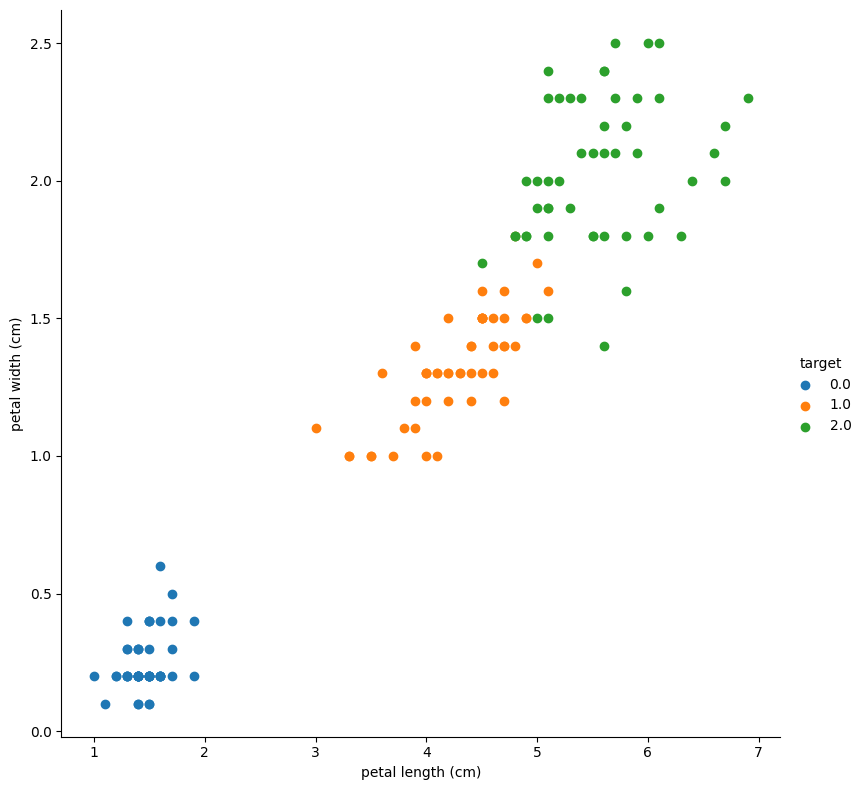

In [ ]:
#This is the KNN

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%pylab inline
%matplotlib inline

#load data
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names']+['target'])
df.head()
df["target"].value_counts()


sns.FacetGrid(df, hue="target",height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

model = KNeighborsClassifier(n_neighbors=5)
model.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

x = iris.data
y = iris.target

#split training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#prediction and score
predicted = model.predict(iris.data)
expected = iris.target
model.score(iris.data, iris.target)

#score results
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))





In [ ]:
# This is the LVQ

#imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class LVQ:
  def __init__(self):
    self.codebook_vectors = None

  def euclideanDistance(self, x1, x2):
    return np.linalg.norm(x1-x2)

  def findClosestVector(self, x):
    distances=[self.euclideanDistance(x, codebook_vector) for codebook_vector in self.codebook_vectors]
    return np.argmin(distances)

  def fit(self, x, y, learningRate=0.1):
    if self.codebook_vectors is None:
      unique_classes = np.unique(y)
      self.codebook_vectors = np.array([np.mean(x[y == cls], axis=0) for cls in unique_classes])
    for i in range(len(x)):
      x_value=x[i]
      y_value=y[i]
      closestVectorIndex = self.findClosestVector
      if y_value == closestVectorIndex:
          self.codebook_vectors[y_value] += learningRate * (x_value - self.codebook_vectors[y_value])
      else:
          self.codebook_vectors[y_value] -= learningRate * (x_value - self.codebook_vectors[y_value])

  def predict(self, x):
    predictions=[]
    for x_value in x:
      closestVectorIndex = self.findClosestVector
      predictions.append(closestVectorIndex)
    return predictions

iris = datasets.load_iris()
x = iris.data
y = iris.target

#split training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#initialize codebook vectors
codebook_vectors=np.array([x_train[y_train==i].mean(axis=0) for i in range(3)])

#lvq
lvq=LVQ()
lvq.fit(x_train, y_train)

y_predict=lvq.predict(x_test)

print(np.unique(y_test))


[0 1 2]


In [ ]:
#This is the Linear Regression Algorithm

#imports
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


#load data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# x and y represent data and target
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

#initialize everything
class LinearRegression:
  def __init__(self, learningRate=0.1, iterations=1000):
    self.learningRate=learningRate
    self.iterations=iterations
    self.weights=None
    self.bias=None
  def fit(self, x, y):
    samples, features = x.shape
    self.weights = np.zeros(features)
    self.bias=0

    #gradient descent
    for i in range(self.iterations):
      y_predict = np.dot(x, self.weights)+self.bias
      grad_dw=(1/samples)*np.dot(x.T, (y_predict - y))
      grad_db=(1/samples)*np.sum(y_predict - y)

      self.weights -= self.learningRate*grad_dw
      self.bias -= self.learningRate*grad_db

  def predict(self, x):
    return np.dot(x, self.weights)+self.bias

 #split training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


#initialize/fit linear regression model

linear_regression = LinearRegression(learningRate=0.1, iterations=1000)
linear_regression.fit(x_train, y_train)

y_predict = linear_regression.predict(x_test)

mask = ~np.isnan(y_test) & ~np.isnan(y_predict)
meanSquaredError = mean_squared_error(y_test[mask], y_predict[mask])

print("Mean squared error: ", meanSquaredError)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.